## Imports

In [1]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix

<ipython-input-1-118a2c41e216>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## EDA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving point_contact_numeric_raw_lumped logisitic knotted spline mussels for the eight sites for data vis (1 M slr).csv to point_contact_numeric_raw_lumped logisitic knotted spline mussels for the eight sites for data vis (1 M slr).csv


In [3]:
df = pd.read_csv('point_contact_numeric_raw_lumped logisitic knotted spline mussels for the eight sites for data vis (1 M slr).csv')

# Display the first few rows of the DataFrame to verify the data
df.head()

,intertidal_sitename,MARINe_site_code,intertidal_sort_order,latitude(dd),longitude(dd),survey_rep,year,month,day,section,...,Mean(z_rock_height),Z_1M SLR,y_true,count MytCal,Offset height,relief,Lin[1] By intertidal_sitename,Prob[1] By intertidal_sitename,Lin[1] 1 M SLR By intertidal_sitename,Prob[1] + 1 M SLR By intertidal_sitename
0,Fogarty Creek,FOG,4300,44.837085,-124.05778,1,2001,6,21,1,...,2.640000,1.640000,3.499433,0,2.625103,0.014897,-5.366541,0.004649,-0.234597,0.441618
1,Fogarty Creek,FOG,4300,44.837085,-124.05778,1,2001,6,21,1,...,2.625103,1.625103,3.999211,0,2.640000,0.014897,-5.368504,0.004639,-0.292102,0.427489
2,Fogarty Creek,FOG,4300,44.837085,-124.05778,1,2001,6,21,1,...,2.610000,1.610000,4.498983,0,2.625103,0.015103,-5.376279,0.004604,-0.358843,0.411240
3,Fogarty Creek,FOG,4300,44.837085,-124.05778,1,2001,6,21,1,...,2.535124,1.535124,4.993345,0,2.610000,0.074876,-5.977774,0.002528,-1.145823,0.241253
4,Fogarty Creek,FOG,4300,44.837085,-124.05778,1,2001,6,21,1,...,2.460000,1.460000,5.487669,0,2.535124,0.075124,-5.938181,0.002630,-1.390257,0.199367


In [4]:
df.columns

Index(['intertidal_sitename', 'MARINe_site_code', 'intertidal_sort_order',
       'latitude(dd)', 'longitude(dd)', 'survey_rep', 'year', 'month', 'day',
       'section', 'x_transect', 'y_location', 'point', 'method_code',
       'pc_point_type', 'Mean(z_rock_height)', 'Z_1M SLR', 'y_true',
       'count MytCal', 'Offset height', 'relief',
       'Lin[1] By intertidal_sitename', 'Prob[1] By intertidal_sitename',
       'Lin[1] 1 M SLR By intertidal_sitename',
       'Prob[1] + 1 M SLR By intertidal_sitename'],
      dtype='object')

In [5]:
# Features I will use for modeling
ml_df = df[['intertidal_sitename',
           'latitude(dd)',
           'longitude(dd)',
           'year',
           'section',
           'x_transect',
           'y_location',
           'Mean(z_rock_height)',
           'count MytCal',
           'Prob[1] By intertidal_sitename',
           'Z_1M SLR',
           'Prob[1] + 1 M SLR By intertidal_sitename']]

ml_df.head(20)

,intertidal_sitename,latitude(dd),longitude(dd),year,section,x_transect,y_location,Mean(z_rock_height),count MytCal,Prob[1] By intertidal_sitename,Z_1M SLR,Prob[1] + 1 M SLR By intertidal_sitename
0,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,0.0,2.640000,0,0.004649,1.640000,0.441618
1,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,0.5,2.625103,0,0.004639,1.625103,0.427489
2,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,1.0,2.610000,0,0.004604,1.610000,0.411240
3,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,1.5,2.535124,0,0.002528,1.535124,0.241253
4,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,2.0,2.460000,0,0.002630,1.460000,0.199367
5,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,2.5,2.400149,0,0.002913,1.400149,0.182821
6,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,3.0,2.340000,0,0.003495,1.340000,0.184587
7,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,3.0,2.340000,0,0.009544,1.340000,0.354197
8,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,3.5,2.240175,0,0.005174,1.240175,0.193606
9,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,3.5,2.240175,0,0.016623,1.240175,0.387788


In [6]:
ml_df['count MytCal'].describe()

count    41868.000000
mean         0.158618
std          0.365323
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: count MytCal, dtype: float64

In [7]:
# Look at uneveness of data
ml_df.groupby(by = "count MytCal").count()

,intertidal_sitename,latitude(dd),longitude(dd),year,section,x_transect,y_location,Mean(z_rock_height),Prob[1] By intertidal_sitename,Z_1M SLR,Prob[1] + 1 M SLR By intertidal_sitename
count MytCal,,,,,,,,,,,
0,35227,35227,35227,35227,35227,35227,35227,35227,35227,35227,35227
1,6641,6641,6641,6641,6641,6641,6641,6641,6641,6641,6641


## Build Model #1
### Model to predict presence of a mussel
Oversampling applied



In [8]:
# Calculate the percentage of negative values
percentage_negative = (ml_df['Z_1M SLR'] < 0).mean() * 100

print(f"Percentage of adjusted rock heights that are negative: {percentage_negative:.2f}%")

Percentage of adjusted rock heights that are negative: 58.30%


Question for UCSC: How long can mussels be out of water?

In [9]:
X = ml_df[['latitude(dd)', 'longitude(dd)', 'year', 'Mean(z_rock_height)']]
y = ml_df['count MytCal']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the test set by sampling a fixed number of records for each class
num_samples_per_class = 2000
class_1_samples = X_test[y_test == 1].sample(n=num_samples_per_class, replace=True, random_state=42)
class_0_samples = X_test[y_test == 0].sample(n=num_samples_per_class, replace=True, random_state=42)
X_test_balanced = pd.concat([class_1_samples, class_0_samples])
y_test_balanced = y_test.loc[X_test_balanced.index]

# Initialize and train the model on the original training set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test_balanced)

Evaluate Model

In [11]:
# Evaluate the model
# Display confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test_balanced, y_pred))
print("Accuracy:", accuracy_score(y_test_balanced, y_pred))
print("Classification Report:\n", classification_report(y_test_balanced, y_pred))

Confusion Matrix:
[[1770  230]
 [1450  550]]
Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.89      0.68      2000
           1       0.71      0.28      0.40      2000

    accuracy                           0.58      4000
   macro avg       0.63      0.58      0.54      4000
weighted avg       0.63      0.58      0.54      4000



The baseline accuracy is higher than the model accuracy, meaning that if the model guessed "0" for every prediction it would be more accurate than the model I created.

## Build Model #2
### Model to predict mussels that would be underwater with 1m SLR

In [12]:
ml_df['Z_1M SLR'].describe()

count    41868.000000
mean        -0.200443
std          0.982374
min         -2.984974
25%         -0.980000
50%         -0.252263
75%          0.630815
max          2.142500
Name: Z_1M SLR, dtype: float64

In [13]:
ml_df.head()

,intertidal_sitename,latitude(dd),longitude(dd),year,section,x_transect,y_location,Mean(z_rock_height),count MytCal,Prob[1] By intertidal_sitename,Z_1M SLR,Prob[1] + 1 M SLR By intertidal_sitename
0,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,0.0,2.640000,0,0.004649,1.640000,0.441618
1,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,0.5,2.625103,0,0.004639,1.625103,0.427489
2,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,1.0,2.610000,0,0.004604,1.610000,0.411240
3,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,1.5,2.535124,0,0.002528,1.535124,0.241253
4,Fogarty Creek,44.837085,-124.05778,2001,1,0.0,2.0,2.460000,0,0.002630,1.460000,0.199367


In [14]:
# Define features and target variable
# lat, long sort of serve as site name
X = ml_df[['latitude(dd)', 'longitude(dd)', 'year','Z_1M SLR']]
y = ml_df['count MytCal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the test set by sampling a fixed number of records for each class
num_samples_per_class = 2000
class_1_samples = X_test[y_test == 1].sample(n=num_samples_per_class, replace=True, random_state=42)
class_0_samples = X_test[y_test == 0].sample(n=num_samples_per_class, replace=True, random_state=42)
X_test_balanced = pd.concat([class_1_samples, class_0_samples])
y_test_balanced = y_test.loc[X_test_balanced.index]

In [15]:
# Initialize the model with a varying number of trees
n_estimators_range = range(1, 101, 5)
mse_train_values = []
mse_test_values = []

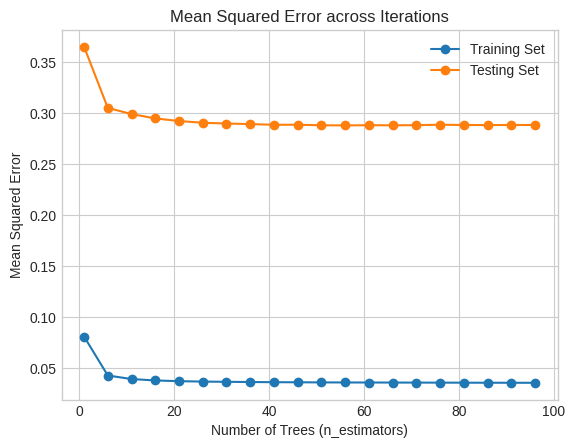

In [16]:
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)  # Train the model on the original training set

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test_balanced)

    # Calculate MSE for training and testing sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test_balanced, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting
plt.plot(n_estimators_range, mse_train_values, label='Training Set', marker='o', linestyle='-')
plt.plot(n_estimators_range, mse_test_values, label='Testing Set', marker='o', linestyle='-')
plt.title('Mean Squared Error across Iterations')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Results: Adding more trees (iterations) does not lead to a lower MSE
- optimized at about 5 trees
- but still, the model is overfitting to the training data